In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Stock Correlation in Portfolio Mgt


In [2]:
assetList = ['BAC', 'WMT', 'JNPR', 'JNJ', 'CVS', 'BX', 'ORCL', 'T', 'SHEL'] 

price_data = pd.DataFrame()
for asset in assetList:
    data = yf.download(asset, start="2021-01-01", end="2023-04-23")
    data["Symbol"] = asset
    price_data = pd.concat([price_data, data])

price_data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
pivot_df = price_data.pivot('Date','Symbol','Close').reset_index()
pivot_df.head()

C:\Users\grant\AppData\Local\Temp\ipykernel_4300\3137756253.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_df = price_data.pivot('Date','Symbol','Close').reset_index()


Symbol,Date,BAC,BX,CVS,JNJ,JNPR,ORCL,SHEL,T,WMT
0,2021-01-04,30.030001,63.000000,69.989998,156.500000,22.610001,63.750000,36.029999,22.235649,146.529999
1,2021-01-05,30.260000,62.810001,70.459999,158.339996,23.360001,62.959999,38.509998,22.099697,145.750000
2,2021-01-06,32.150002,61.660000,72.559998,159.830002,23.580000,62.570000,40.290001,22.530210,146.660004
3,2021-01-07,32.860001,63.230000,73.989998,160.369995,23.830000,63.070000,40.340000,22.590633,146.649994
4,2021-01-08,32.529999,62.900002,74.860001,160.039993,23.799999,63.380001,40.240002,21.918428,146.630005


In [4]:
corr_df = pivot_df.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head()

C:\Users\grant\AppData\Local\Temp\ipykernel_4300\2888547379.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = pivot_df.corr(method='pearson')


Symbol,BAC,BX,CVS,JNJ,JNPR,ORCL,SHEL,T,WMT
Symbol,,,,,,,,,
BAC,1.000000,0.731284,0.316738,0.058145,0.271173,0.454788,-0.353276,0.087544,0.231402
BX,0.731284,1.000000,0.532243,0.191501,0.540849,0.587577,0.007884,-0.314904,0.161976
CVS,0.316738,0.532243,1.000000,0.564655,0.655780,0.085723,0.457586,-0.614433,0.006593
JNJ,0.058145,0.191501,0.564655,1.000000,0.342647,-0.071798,0.196797,-0.040239,0.137108
JNPR,0.271173,0.540849,0.655780,0.342647,1.000000,0.520727,0.606677,-0.520599,0.378661


<Axes: xlabel='Symbol', ylabel='Symbol'>

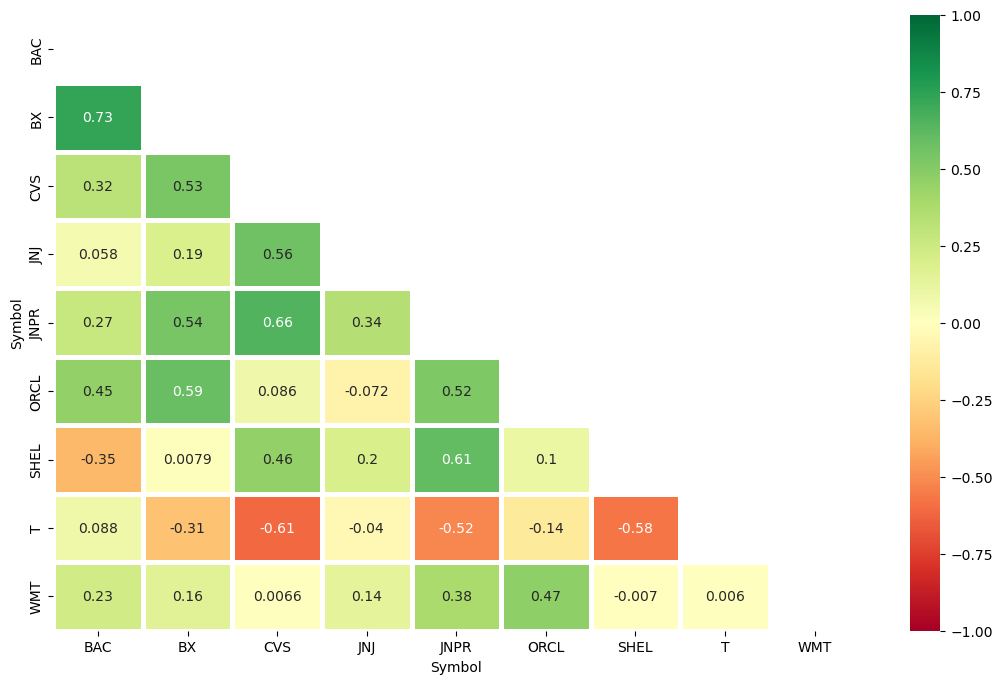

In [5]:
#grab bottom half
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

#plot correlations
plt.figure(figsize=(13,8))
sns.heatmap(corr_df, annot=True, cmap='RdYlGn', vmax=1.0,vmin=-1.0, mask = mask, linewidths=2.5)

In [6]:
avg_corr = corr_df.mean()
print(avg_corr)

Symbol
BAC     0.310866
BX      0.382046
CVS     0.333876
JNJ     0.264313
JNPR    0.421768
ORCL    0.334628
SHEL    0.159313
T      -0.123566
WMT     0.265105
dtype: float64


In [7]:
print(avg_corr.mean())

0.26092769678237515
